In [20]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 한글 깨짐 방지
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 오류 무시
import warnings
warnings.filterwarnings('ignore')

In [21]:
# 데이터 불러오기
# 경로지정 변경확인 필요
df = pd.read_csv(r'C:\Users\puzzl\gongmo\pow-gongmo\data\final\final_animal_visit_travel.csv', encoding ='cp949')

In [22]:
# 데이터확인
df.head()

,시군구,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12
0,가평군,22105529,13,11,223,35,37,4.17,3.95,3.99
1,강남구,103309405,2,11,3,10,36,4.10,4.13,3.98
2,강동구,23706460,2,6,1,2,18,3.60,3.92,3.96
3,강릉시,26260986,8,11,70,33,33,4.27,4.13,3.75
4,강북구,18328235,1,5,1,6,19,4.50,4.00,3.89


In [23]:
# 데이터의 shape 파악
# 229행 10열
df.shape

(229, 10)

In [24]:
# 기초통계량 확인
df.describe()

,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12
count,2.290000e+02,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,1.832286e+07,4.074236,7.275109,14.703057,5.637555,15.078603,4.146114,4.016157,3.936507
std,1.640632e+07,5.150259,6.703517,31.437198,7.797581,17.890332,0.421847,0.427156,0.435901
min,1.376345e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.756851e+06,2.000000,3.000000,1.000000,1.000000,2.000000,4.110000,3.970000,3.920000
50%,1.345986e+07,3.000000,5.000000,4.000000,3.000000,9.000000,4.190000,4.060000,4.000000
75%,2.430010e+07,5.000000,10.000000,13.000000,7.000000,21.000000,4.260000,4.150000,4.070000
max,1.033094e+08,54.000000,52.000000,228.000000,44.000000,98.000000,4.750000,4.570000,4.670000


In [25]:
# 결측치 개수 파악
# 결측치 존재 x
# -> 하지만 A10~A12에서 0점인 경우는 설문조사 응답자중 해당 시군구에 방문한 사람이 없는경우 이기 때문에 결측치라고 간주해야함
# 따라서 A10~A12가 0점인 성북구, 인천광역시 동구를 제외함
df.isnull().sum()
df2 = df[(df['시군구'] != '성북구')&(df['시군구'] != '인천광역시 동구')]

시군구      0
방문자 수    0
관광명소     0
기타       0
숙박       0
음식점      0
카페       0
A10      0
A11      0
A12      0
dtype: int64

In [28]:
# 변수 타입 파악
df2.dtypes

시군구       object
방문자 수      int64
관광명소       int64
기타         int64
숙박         int64
음식점        int64
카페         int64
A10      float64
A11      float64
A12      float64
dtype: object

In [29]:
# 시군구 컬럼을 제외한 데이터프레임 생성 (연속형 변수만 선택)
df3 = df2.drop(columns = ['시군구'])

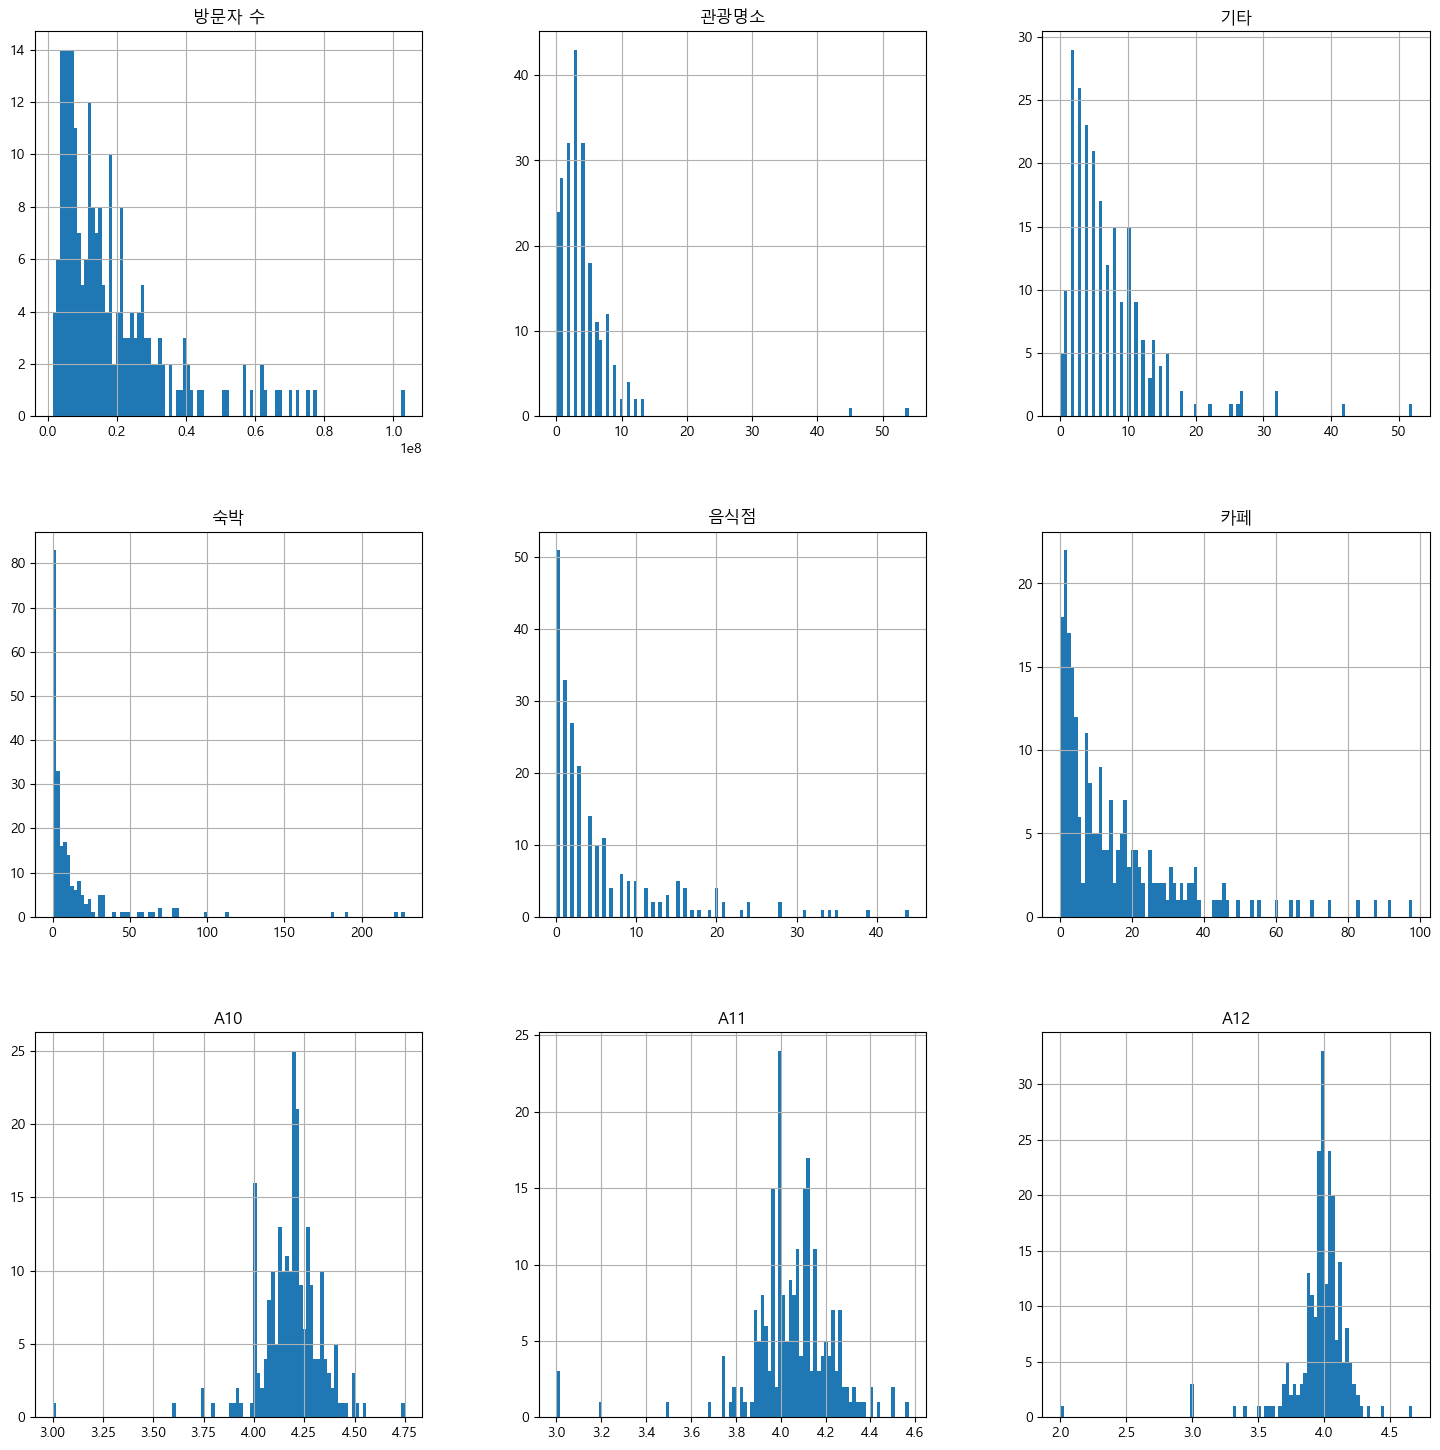

In [30]:
# 각각 연속형변수에 대해 분포 확인
# 방문자수, 관광명소, 기타, 숙박, 음식점, 카페는 왼쪽으로 치우쳐진 분포의 형태를 띄고 있음
# -> 따라서 해당 변수에대한 정규화 필요해보임
df3.hist(bins=100, figsize=(18,18))
plt.show()